# Кто длиннее?

Правда ли, что у Л. Н. Толстого длинные предложения. Значимо ли они длиннее, чем у Чехова?

In [1]:
import pandas as pd

sents = pd.read_excel('tolstoj_chehov.xlsx')

In [2]:
sents

,Предложение,Дата,Автор
0,Оставайся!,1885,А. П. Чехов
1,Львов.,1887,А. П. Чехов
2,Пожалуйте!,1884,А. П. Чехов
3,Борцов.,1885,А. П. Чехов
4,Исковеркаю!,1892,А. П. Чехов
...,...,...,...
1196,Так как брошюры эти были написаны мною и издав...,1909,Л. Н. Толстой
1197,"Здесь, приехавши в Гриневку и увидав заморышей...",1894,Л. Н. Толстой
1198,Не буду говорить о тех миллионах глупостей и г...,1909,Л. Н. Толстой
1199,Сейчас у нас с России происходит нечто необыкн...,1899,Л. Н. Толстой


In [3]:
sents['Автор'].unique()

array(['А. П. Чехов', 'коллективный', 'Л. Н. Толстой'], dtype=object)

In [4]:
sents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1201 entries, 0 to 1200
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Предложение  1201 non-null   object
 1   Дата         1201 non-null   object
 2   Автор        1201 non-null   object
dtypes: object(3)
memory usage: 28.3+ KB


In [5]:
sents['word_len'] = sents['Предложение'].apply(lambda x: len(str(x).split()))
sents

,Предложение,Дата,Автор,word_len
0,Оставайся!,1885,А. П. Чехов,1
1,Львов.,1887,А. П. Чехов,1
2,Пожалуйте!,1884,А. П. Чехов,1
3,Борцов.,1885,А. П. Чехов,1
4,Исковеркаю!,1892,А. П. Чехов,1
...,...,...,...,...
1196,Так как брошюры эти были написаны мною и издав...,1909,Л. Н. Толстой,98
1197,"Здесь, приехавши в Гриневку и увидав заморышей...",1894,Л. Н. Толстой,99
1198,Не буду говорить о тех миллионах глупостей и г...,1909,Л. Н. Толстой,127
1199,Сейчас у нас с России происходит нечто необыкн...,1899,Л. Н. Толстой,145


<Axes: >

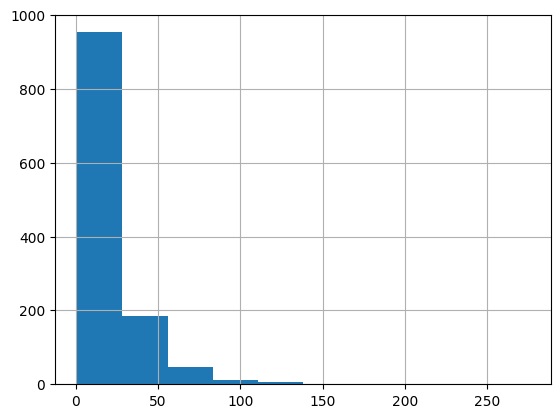

In [6]:
sents['word_len'].hist()

In [7]:
sents.groupby('Автор')['word_len'].mean()

Автор
А. П. Чехов      16.722488
Л. Н. Толстой    32.083770
коллективный     20.451697
Name: word_len, dtype: float64

А. П. Чехов
коллективный
Л. Н. Толстой


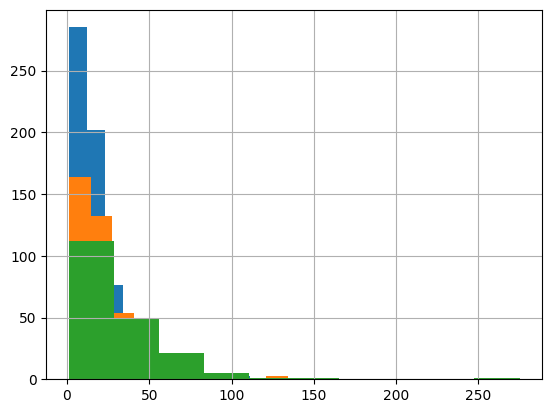

In [8]:
for author in list(sents['Автор'].unique()):
    print(author)
    sents[sents['Автор'] == author]['word_len'].hist()

array([[<Axes: title={'center': 'А. П. Чехов'}>,
        <Axes: title={'center': 'Л. Н. Толстой'}>],
       [<Axes: title={'center': 'коллективный'}>, <Axes: >]], dtype=object)

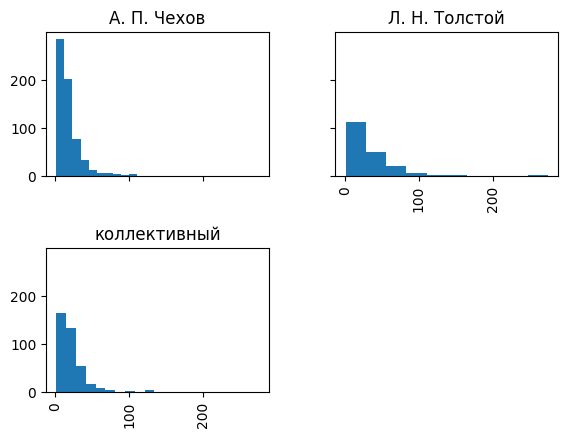

In [9]:
sents.hist('word_len', by='Автор', sharex=True, sharey=True)

**Как ответить на вопрос, случайно ли такое распределение или у Л. Н. Толстого правда предложения длиннее?**

### Существует t-test

Одновыборочный отвечает на вопрос, может ли наша выборка быть не из генеральной совокупности с определённым средним (на каком-то уровне значимости).

Двувыборочный отвечает на вопрос, могут ли две наши выборки быть не из генеральной совокупности (на каком-то уровне значимости).

![t-test](https://raw.githubusercontent.com/tbkazakova/python-datan_2023_minor/main/data/ttest.png)

In [10]:
! pip install scipy

In [11]:
import numpy as np
from scipy import stats

# У нас есть оценки
student_scores = np.array([72, 89, 65, 73, 79, 84, 63, 76, 85, 75])

# Вышка думает, что средняя оценка при 100 шкале - 70
mu = 70

#Хотим понять, у нас рандомные студенты из генеральной совокупности
# или это какие-то особенные (старательные или наоборот не старательные)

# Нулевая гипотеза - рандомные студенты из генеральной совокупности, среднее незначимо отличается от того, что в генеральной совокупности
# Ненулевая гипотеза - у нас какие-то особенные, среднее значимо отличается от того, что в генеральной совокупности

# Используем одновыборочный t-test
t_stat, p_value = stats.ttest_1samp(student_scores, mu)
print("T statistic:", t_stat)
print("P-value:", p_value)

# Вот такой у нас уровень значимости. Это значит, что мы готовы ошибиться в 5 случаях из 100
alpha = 0.05

# Интерпретируем результат
if p_value < alpha:
    print("Отклоняем нулевую гипотезу, есть статистически значимая разница между средними выборки и генеральной совокупности.")
else:
    print("Не получается отклонить нулевую гипотезу, нет статистически значимой разницы между средними выборки и генеральной совокупности.")

T statistic: 2.2894683580127317
P-value: 0.047816221110566944
Отклоняем нулевую гипотезу, есть статистически значимая разница между средними выборки и генеральной совокупности.


**Это был одновыборочный. А нам нужен двувыборочный для наших данных. У нас Чехов и Толстой.**

In [12]:
chehov = sents[sents['Автор'] == 'А. П. Чехов']['word_len'].values
tolstoj = sents[sents['Автор'] == 'Л. Н. Толстой']['word_len'].values
tolstoj

array([  1,   1,   2,   2,   2,   2,   3,   3,   4,   4,   5,   6,   7,
         7,   7,   8,   8,   8,   8,   8,   9,   9,   9,   9,  10,  10,
        10,  10,  11,  11,  11,  11,  11,  11,  12,  12,  12,  12,  13,
        13,  13,  14,  14,  14,  14,  15,  15,  15,  15,  16,  16,  16,
        16,  16,  16,  17,  17,  17,  17,  17,  17,  18,  18,  18,  19,
        19,  19,  19,  20,  20,  20,  20,  20,  20,  20,  20,  21,  21,
        21,  21,  21,  21,  21,  22,  22,  22,  23,  23,  23,  23,  23,
        23,  24,  24,  24,  24,  25,  25,  26,  26,  26,  26,  27,  27,
        27,  27,  28,  28,  28,  28,  28,  28,  29,  29,  29,  29,  30,
        30,  30,  30,  30,  31,  31,  31,  31,  31,  31,  32,  32,  32,
        34,  35,  35,  35,  35,  37,  37,  38,  38,  38,  38,  39,  40,
        40,  41,  41,  43,  43,  43,  46,  46,  48,  49,  49,  50,  50,
        50,  51,  53,  53,  55,  55,  56,  56,  57,  58,  58,  58,  59,
        63,  63,  66,  67,  67,  68,  70,  70,  72,  73,  73,  7

t-test придуман для выборок с нормальным распределением.

Будем использовать аналог t-test, которому неважно, какое распределение.

### Тест Манна-Уитни

In [13]:
from scipy.stats import mannwhitneyu

In [14]:
res = mannwhitneyu(tolstoj, chehov, alternative="greater")
print(res)

MannwhitneyuResult(statistic=86704.0, pvalue=3.076490071036075e-21)


**Какой вывод?**

p-value маленькое, сильно меньше порога. Мы можем смело отвергать нулевую гипотезу о том, что между Толстым и Чеховым нет статистически значимой разницы. И примать гипотезу о том, что предложения у Толстого длиннее, чем у Чехова.

**Что значит одно- или двусторонний тест?**

![Что значит одно- или двусторонний тест?](https://raw.githubusercontent.com/tbkazakova/python-datan_2023_minor/main/data/one_vs_two_sided.png)

# Хи-квадрат

Объяснение: https://r-analytics.blogspot.com/2012/08/blog-post.html

Онлайн-калькулятор: https://www.socscistatistics.com/tests/chisquare2/default2.aspx

# Ключевые слова. TF-IDF

Как сравнить? Как понять, какой текст о чём? Как выделить ключевые слова?

In [15]:
import os

In [16]:
file_list = os.listdir()  # список файлов и папок в директории, где запущена программа
file_list

['olymp.csv',
 'gismeteo.csv',
 '.DS_Store',
 'ice-cream.csv',
 'tolstoj_chehov.xlsx',
 'info.txt',
 '231216_andan_examples.ipynb',
 'music.csv',
 'first_text.txt',
 'boxplots.ipynb',
 '230909_python_intro_arithmetic.ipynb',
 '.ipynb_checkpoints',
 'interesting_file.txt',
 'smeshariki',
 '20231028_files_training.ipynb',
 'data']

In [17]:
file_list = os.listdir('./smeshariki')
file_list

['1_skamejka.txt', '16_biografijazontika.txt', '215_kaketobylo.txt']

In [18]:
! pip3 install pymystem3

In [19]:
from pymystem3 import Mystem
m = Mystem()

In [20]:
text_lex = {}
for textname in file_list:
    with open('./smeshariki/'+textname, encoding='UTF-8') as f:
        text = f.read()
    lemmas = m.lemmatize(text)
    lex = []
    for lemma in lemmas:
        if lemma.isalpha():
            lex.append(lemma)
    text_lex[textname[:-4]] = lex  # получили словарь {название текста: список лемм}

In [21]:
list(text_lex.keys())

['1_skamejka', '16_biografijazontika', '215_kaketobylo']

In [22]:
text_lex['1_skamejka'][:20]

['крош',
 'давно',
 'хотеть',
 'сделать',
 'для',
 'свой',
 'дома',
 'полезный',
 'и',
 'решать',
 'смастерить',
 'скамейка',
 'после',
 'несколько',
 'день',
 'работа',
 'скамейка',
 'быть',
 'готовый',
 'крош']

- сравнить самые частотные слова

In [23]:
import collections

In [24]:
for text in text_lex:
    print(text)
    fdist = collections.Counter(text_lex[text])
    print(fdist.most_common(15))

1_skamejka
[('и', 21), ('он', 12), ('крош', 10), ('ежик', 10), ('не', 10), ('бараш', 10), ('что', 8), ('скамейка', 7), ('на', 7), ('розовый', 6), ('но', 6), ('друг', 6), ('краска', 5), ('вдохновение', 5), ('понимать', 5)]
16_biografijazontika
[('и', 16), ('зонтик', 15), ('в', 13), ('бараш', 12), ('он', 9), ('с', 7), ('свой', 7), ('они', 7), ('крош', 7), ('ежик', 7), ('к', 6), ('этот', 5), ('что', 4), ('старый', 4), ('не', 4)]
215_kaketobylo
[('и', 10), ('что', 5), ('крош', 4), ('они', 4), ('не', 4), ('ежик', 3), ('на', 3), ('это', 3), ('он', 3), ('бараш', 3), ('скамейка', 2), ('вспоминать', 2), ('из', 2), ('серия', 2), ('но', 2)]


Ну вот, стопслова не убрали. Убираем.

In [25]:
stopwords = ["c", "а", "алло", "без", "белый", "близко", "более", "больше", "большой", "будем", "будет", "будете", "будешь", "будто", "буду", "будут", "будь", "бы", "бывает", "бывь", "был", "была", "были", "было", "быть", "в", "важная", "важное", "важные", "важный", "вам", "вами", "вас", "ваш", "ваша", "ваше", "ваши", "вверх", "вдали", "вдруг", "ведь", "везде", "вернуться", "весь", "вечер", "взгляд", "взять", "вид", "видел", "видеть", "вместе", "вне", "вниз", "внизу", "во", "вода", "война", "вокруг", "вон", "вообще", "вопрос", "восемнадцатый", "восемнадцать", "восемь", "восьмой", "вот", "впрочем", "времени", "время", "все", "все еще", "всегда", "всего", "всем", "всеми", "всему", "всех", "всею", "всю", "всюду", "вся", "всё", "второй", "вы", "выйти", "г", "где", "главный", "глаз", "говорил", "говорит", "говорить", "год", "года", "году", "голова", "голос", "город", "да", "давать", "давно", "даже", "далекий", "далеко", "дальше", "даром", "дать", "два", "двадцатый", "двадцать", "две", "двенадцатый", "двенадцать", "дверь", "двух", "девятнадцатый", "девятнадцать", "девятый", "девять", "действительно", "дел", "делал", "делать", "делаю", "дело", "день", "деньги", "десятый", "десять", "для", "до", "довольно", "долго", "должен", "должно", "должный", "дом", "дорога", "друг", "другая", "другие", "других", "друго", "другое", "другой", "думать", "душа", "е", "его", "ее", "ей", "ему", "если", "есть", "еще", "ещё", "ею", "её", "ж", "ждать", "же", "жена", "женщина", "жизнь", "жить", "за", "занят", "занята", "занято", "заняты", "затем", "зато", "зачем", "здесь", "земля", "знать", "значит", "значить", "и", "иди", "идти", "из", "или", "им", "имеет", "имел", "именно", "иметь", "ими", "имя", "иногда", "их", "к", "каждая", "каждое", "каждые", "каждый", "кажется", "казаться", "как", "какая", "какой", "кем", "книга", "когда", "кого", "ком", "комната", "кому", "конец", "конечно", "которая", "которого", "которой", "которые", "который", "которых", "кроме", "кругом", "кто", "куда", "лежать", "лет", "ли", "лицо", "лишь", "лучше", "любить", "люди", "м", "маленький", "мало", "мать", "машина", "между", "меля", "менее", "меньше", "меня", "место", "миллионов", "мимо", "минута", "мир", "мира", "мне", "много", "многочисленная", "многочисленное", "многочисленные", "многочисленный", "мной", "мною", "мог", "могу", "могут", "мож", "может", "может быть", "можно", "можхо", "мои", "мой", "мор", "москва", "мочь", "моя", "моё", "мы", "на", "наверху", "над", "надо", "назад", "наиболее", "найти", "наконец", "нам", "нами", "народ", "нас", "начала", "начать", "наш", "наша", "наше", "наши", "не", "него", "недавно", "недалеко", "нее", "ней", "некоторый", "нельзя", "нем", "немного", "нему", "непрерывно", "нередко", "несколько", "нет", "нею", "неё", "ни", "нибудь", "ниже", "низко", "никакой", "никогда", "никто", "никуда", "ним", "ними", "них", "ничего", "ничто", "но", "новый", "нога", "ночь", "ну", "нужно", "нужный", "нх", "о", "об", "оба", "обычно", "один", "одиннадцатый", "одиннадцать", "однажды", "однако", "одного", "одной", "оказаться", "окно", "около", "он", "она", "они", "оно", "опять", "особенно", "остаться", "от", "ответить", "отец", "откуда", "отовсюду", "отсюда", "очень", "первый", "перед", "писать", "плечо", "по", "под", "подойди", "подумать", "пожалуйста", "позже", "пойти", "пока", "пол", "получить", "помнить", "понимать", "понять", "пор", "пора", "после", "последний", "посмотреть", "посреди", "потом", "потому", "почему", "почти", "правда", "прекрасно", "при", "про", "просто", "против", "процентов", "путь", "пятнадцатый", "пятнадцать", "пятый", "пять", "работа", "работать", "раз", "разве", "рано", "раньше", "ребенок", "решить", "россия", "рука", "русский", "ряд", "рядом", "с", "с кем", "сам", "сама", "сами", "самим", "самими", "самих", "само", "самого", "самой", "самом", "самому", "саму", "самый", "свет", "свое", "своего", "своей", "свои", "своих", "свой", "свою", "сделать", "сеаой", "себе", "себя", "сегодня", "седьмой", "сейчас", "семнадцатый", "семнадцать", "семь", "сидеть", "сила", "сих", "сказал", "сказала", "сказать", "сколько", "слишком", "слово", "случай", "смотреть", "сначала", "снова", "со", "собой", "собою", "советский", "совсем", "спасибо", "спросить", "сразу", "стал", "старый", "стать", "стол", "сторона", "стоять", "страна", "суть", "считать", "т", "та", "так", "такая", "также", "таки", "такие", "такое", "такой", "там", "твои", "твой", "твоя", "твоё", "те", "тебе", "тебя", "тем", "теми", "теперь", "тех", "то", "тобой", "тобою", "товарищ", "тогда", "того", "тоже", "только", "том", "тому", "тот", "тою", "третий", "три", "тринадцатый", "тринадцать", "ту", "туда", "тут", "ты", "тысяч", "у", "увидеть", "уж", "уже", "улица", "уметь", "утро", "хороший", "хорошо", "хотел бы", "хотеть", "хоть", "хотя", "хочешь", "час", "часто", "часть", "чаще", "чего", "человек", "чем", "чему", "через", "четвертый", "четыре", "четырнадцатый", "четырнадцать", "что", "чтоб", "чтобы", "чуть", "шестнадцатый", "шестнадцать", "шестой", "шесть", "эта", "эти", "этим", "этими", "этих", "это", "этого", "этой", "этом", "этому", "этот", "эту", "я", "являюсь"]

In [26]:
text_lex_nostopw = {}
for textname in text_lex:
    words_nostopw = []
    for word in text_lex[textname]:
        if word not in stopwords:
            words_nostopw.append(word)
    text_lex_nostopw[textname] = words_nostopw      

In [27]:
for text in text_lex_nostopw:
    print(text)
    fdist = collections.Counter(text_lex_nostopw[text])
    print(fdist.most_common(15))

1_skamejka
[('крош', 10), ('ежик', 10), ('бараш', 10), ('скамейка', 7), ('розовый', 6), ('краска', 5), ('вдохновение', 5), ('решать', 3), ('приходить', 3), ('рассказывать', 2), ('поэт', 2), ('стих', 2), ('находить', 2), ('закрашивать', 2), ('бегемот', 2)]
16_biografijazontika
[('зонтик', 15), ('бараш', 12), ('крош', 7), ('ежик', 7), ('следующий', 4), ('кадр', 4), ('насос', 4), ('пытаться', 3), ('появляться', 3), ('заплатка', 3), ('шланг', 3), ('струя', 3), ('зонт', 3), ('начинаться', 2), ('вещь', 2)]
215_kaketobylo
[('крош', 4), ('ежик', 3), ('бараш', 3), ('скамейка', 2), ('вспоминать', 2), ('серия', 2), ('залезать', 2), ('дерево', 2), ('начинать', 2), ('дождь', 2), ('поедать', 1), ('арбуз', 1), ('событие', 1), ('смешарик', 1), ('происходить', 1)]


- а ещё хорошо бы биграммы и триграммы посмотреть (больше совпадений - тексты ближе)

In [29]:
import nltk

In [30]:
# Но не с нашими текстами. Они слишком маленькие.
bigr_l = list(nltk.bigrams(text_lex_nostopw['1_skamejka']))
bigr_counter = collections.Counter(bigr_l)
bigr_counter.most_common(10)

[(('крош', 'ежик'), 4),
 (('розовый', 'краска'), 3),
 (('ежик', 'бараш'), 2),
 (('крош', 'дома'), 1),
 (('дома', 'полезный'), 1),
 (('полезный', 'решать'), 1),
 (('решать', 'смастерить'), 1),
 (('смастерить', 'скамейка'), 1),
 (('скамейка', 'скамейка'), 1),
 (('скамейка', 'готовый'), 1)]

А если все тексты о Кроше, Ёжике и Бараше? Тогда все они будут похожими, потому что везде частотны слова "крош", "ёжик", "бараш"?

Да, но нам важно понимать, чем они отличаются.

Точнее будет смотреть на слова, которые в отдельных текстах частотные, а при этом в коллекции документов редкие.

### Есть метод! TF-IDF

- TF — term frequency - частота слова внутри документа
- IDF — inverse document frequency - log(кол-во документов/кол-во документов с этим словом)

TF-IDF = TF*IDF

Чем больше TF-IDF, тем важнее слово.

#(логарифм натуральный, по основанию e≈2,72, но можно и другой)

Давайте сначала на 3х коротких текстах

In [31]:
documentA = 'мама мыла раму'
documentB = 'Мила мыла куклу и раму'
documentC = 'Римма мыла раму и мама мыла раму'

In [32]:
bagOfWordsA = documentA.split(' ')
bagOfWordsB = documentB.split(' ')
bagOfWordsC = documentC.split(' ')

In [33]:
bagOfWordsA

['мама', 'мыла', 'раму']

In [34]:
uniqueWords = set(bagOfWordsA + bagOfWordsB + bagOfWordsC)

In [35]:
# Вот все слова, которые встретились в текстах
uniqueWords

{'Мила', 'Римма', 'и', 'куклу', 'мама', 'мыла', 'раму'}

Делаем словарь {слово: кол-во употреблений} для каждого текста.

In [36]:
numOfWordsA = dict.fromkeys(uniqueWords, 0)
for word in bagOfWordsA:
    numOfWordsA[word] += 1
numOfWordsB = dict.fromkeys(uniqueWords, 0)
for word in bagOfWordsB:
    numOfWordsB[word] += 1
numOfWordsC = dict.fromkeys(uniqueWords, 0)
for word in bagOfWordsC:
    numOfWordsC[word] += 1

In [37]:
# В первом тексте столько раз встретилось каждое из слов
numOfWordsA

{'Мила': 0, 'Римма': 0, 'мыла': 1, 'раму': 1, 'мама': 1, 'и': 0, 'куклу': 0}

Считаем TF (частота слова внутри документа)

In [38]:
def computeTF(wordDict, bagOfWords):
    tfDict = {}
    bagOfWordsCount = len(bagOfWords)
    for word, count in wordDict.items():
        tfDict[word] = count / float(bagOfWordsCount)
    return tfDict

In [39]:
tfA = computeTF(numOfWordsA, bagOfWordsA)
tfB = computeTF(numOfWordsB, bagOfWordsB)
tfC = computeTF(numOfWordsC, bagOfWordsC)

In [40]:
tfA

{'Мила': 0.0,
 'Римма': 0.0,
 'мыла': 0.3333333333333333,
 'раму': 0.3333333333333333,
 'мама': 0.3333333333333333,
 'и': 0.0,
 'куклу': 0.0}

Считаем IDF (log(кол-во документов/кол-во документов с этим словом))

один раз для всех слов

In [41]:
import math

def computeIDF(documents):
    N = len(documents)
    
    idfDict = dict.fromkeys(documents[0].keys(), 0)
    for document in documents:
        for word, val in document.items():
            if val > 0:
                idfDict[word] += 1
    
    for word, val in idfDict.items():
        idfDict[word] = math.log(N / float(val))
    return idfDict

In [42]:
idfs = computeIDF([numOfWordsA, numOfWordsB, numOfWordsC])

In [43]:
# Есть слова, которые встретились во многих текстах (значение меньше),
# есть "специфичные", которые встретились в малом кол-ве текстов (значение больше)
idfs

{'Мила': 1.0986122886681098,
 'Римма': 1.0986122886681098,
 'мыла': 0.0,
 'раму': 0.0,
 'мама': 0.4054651081081644,
 'и': 0.4054651081081644,
 'куклу': 1.0986122886681098}

In [44]:
def computeTFIDF(tfBagOfWords, idfs):
    tfidf = {}
    for word, val in tfBagOfWords.items():
        tfidf[word] = val * idfs[word]
    return tfidf

In [45]:
tfidfA = computeTFIDF(tfA, idfs)
tfidfB = computeTFIDF(tfB, idfs)
tfidfC = computeTFIDF(tfC, idfs)

df = pd.DataFrame([tfidfA, tfidfB, tfidfC])  # создаём таблицу

In [46]:
print('\n', documentA, '\n', documentB, '\n', documentC)
df


 мама мыла раму 
 Мила мыла куклу и раму 
 Римма мыла раму и мама мыла раму


,Мила,Римма,мыла,раму,мама,и,куклу
0,0.000000,0.000000,0.0,0.0,0.135155,0.000000,0.000000
1,0.219722,0.000000,0.0,0.0,0.000000,0.081093,0.219722
2,0.000000,0.156945,0.0,0.0,0.057924,0.057924,0.000000


Чем больше значение, тем важнее слово для текста.

"Рама" встречается во всех трёх - у неё значение везде ноль.

"Кукла" и "Мила" встречаются только во втором - они очень важны для второго текста (у них самые большие значения)

### А теперь для смешариков то же самое

In [47]:
bagOfWords_001 = text_lex['1_skamejka']
bagOfWords_215 = text_lex['215_kaketobylo']
bagOfWords_016 = text_lex['16_biografijazontika']

In [48]:
kikoriki_uniqueW = set(bagOfWords_001 + bagOfWords_215 + bagOfWords_016)

In [49]:
numOfWords_001 = dict.fromkeys(kikoriki_uniqueW, 0)
for word in bagOfWords_001:
    numOfWords_001[word] += 1
numOfWords_215 = dict.fromkeys(kikoriki_uniqueW, 0)
for word in bagOfWords_215:
    numOfWords_215[word] += 1
numOfWords_016 = dict.fromkeys(kikoriki_uniqueW, 0)
for word in bagOfWords_016:
    numOfWords_016[word] += 1

In [50]:
idfs = computeIDF([numOfWords_001, numOfWords_215, numOfWords_016])

In [51]:
tfidfA = computeTFIDF(computeTF(numOfWords_001, bagOfWords_001), idfs)
tfidfB = computeTFIDF(computeTF(numOfWords_215, bagOfWords_215), idfs)
tfidfC = computeTFIDF(computeTF(numOfWords_016, bagOfWords_016), idfs)

df = pd.DataFrame([tfidfA, tfidfB, tfidfC])

In [52]:
df

,легкий,башня,точно,красивый,трое,сначала,я,ни,поэт,от,...,огромный,уносить,крош,закрашивать,отверстие,по,давно,начинаться,вдруг,счастие
0,0.003203,0.006406,0.000000,0.003203,0.001182,0.003203,0.003203,0.000000,0.002364,0.003203,...,0.003203,0.000000,0.0,0.006406,0.000000,0.000000,0.001182,0.000000,0.006406,0.003203
1,0.000000,0.000000,0.009079,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.003351,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.001321,0.000000,0.000000,0.003579,0.001321,0.000000,...,0.000000,0.003579,0.0,0.000000,0.003579,0.003579,0.000000,0.007157,0.000000,0.000000


In [53]:
# Посмотрим на слова с наибольшим tf-idf в серии "Скамейка"
collections.Counter(tfidfA).most_common(15)

[('розовый', 0.019217707673494632),
 ('вдохновение', 0.01601475639457886),
 ('краска', 0.01601475639457886),
 ('понимать', 0.01601475639457886),
 ('сделать', 0.009608853836747316),
 ('тут', 0.009608853836747316),
 ('скамейка', 0.008274798124656415),
 ('друг', 0.007092684106848357),
 ('башня', 0.006405902557831544),
 ('писать', 0.006405902557831544),
 ('потом', 0.006405902557831544),
 ('дом', 0.006405902557831544),
 ('бегемот', 0.006405902557831544),
 ('находить', 0.006405902557831544),
 ('потому', 0.006405902557831544)]

In [54]:
# Как это было
collections.Counter(tfidfB).most_common(15)

[('начинать', 0.01815888080443157),
 ('вспоминать', 0.01815888080443157),
 ('дождь', 0.01815888080443157),
 ('точно', 0.009079440402215784),
 ('папа', 0.009079440402215784),
 ('вечер', 0.009079440402215784),
 ('смешарик', 0.009079440402215784),
 ('поедать', 0.009079440402215784),
 ('или', 0.009079440402215784),
 ('наяву', 0.009079440402215784),
 ('ошибочно', 0.009079440402215784),
 ('ля', 0.009079440402215784),
 ('сон', 0.009079440402215784),
 ('все', 0.009079440402215784),
 ('затем', 0.009079440402215784)]

In [55]:
# Биография зонтика
collections.Counter(tfidfC).most_common(15)

[('зонтик', 0.01981099876749989),
 ('кадр', 0.014314166627597522),
 ('следующий', 0.014314166627597522),
 ('насос', 0.014314166627597522),
 ('старый', 0.014314166627597522),
 ('заплатка', 0.01073562497069814),
 ('струя', 0.01073562497069814),
 ('зонт', 0.01073562497069814),
 ('вода', 0.01073562497069814),
 ('перед', 0.01073562497069814),
 ('шланг', 0.01073562497069814),
 ('появляться', 0.01073562497069814),
 ('с', 0.009245132758166614),
 ('свой', 0.009245132758166614),
 ('уже', 0.007157083313798761)]